In [2]:
import numpy as np
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
# Adjust the path to point to external/AlphaPEM
sys.path.append(os.path.abspath("../external/AlphaPEM"))
# Importing constants' value and functions
from configuration.settings import current_density_parameters, physical_parameters, computing_parameters, operating_inputs
from model.AlphaPEM_modified import AlphaPEM_modified

# Adjust the path to point to external/AlphaPEM
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.sampling.sampler import  build_fixed_parameters, sample_parameters, PARAMETER_RANGES
from src.sampling.sampler_modified import get_polarisation_curve_samples_modified

## **Cell Voltage**

The cell voltage calculations are in the module `model/cell_voltage.py`. Based on the equations in Gass thesis of the section *1.3. Voltage physical modelling* summarized in the page 85.
The apparent cell voltage is given by:
$$U_{cell}=U_{eq}-\eta_{c}-i_{fc}[R_p+R_e]$$
* $U_{cell}(V)$ is the cell voltage
* $U_{eq}(V)$ is the equilibrium voltage. The voltage in ideal conditions without losses.
* $\eta_{c}$ is the cathode overpotential
* $R_p(\Omega .m^2)$ is the area specific resistance of the protons (Ohmic Losses)
* $R_e(\Omega .m^2)$ is the area specific resistance of the electrons.

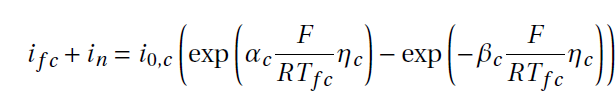

where $i_n$ ($A.m^{−2}$) is the internal current density, $i^{ref}_{0,c}$ is the exchange current density at the cathode, $\alpha_c$ and $\beta_c$ are charge-transfer coefficients of the cathode, and $R$ ($J.mol^{−1}.K^{−1}$) is the universal gas constant.

In [ ]:
info_cmpl = pd.read_pickle('../data/raw/morris_sample_results_N10_lev4_corrected.pkl')
int_curves = info_cmpl.iloc[[1,16,40,120,122,179,180.197]]
columns_nm = list(PARAMETER_RANGES.keys())
int_curves2 = int_curves.loc[:, int_curves.columns.isin(columns_nm)]

In [17]:
results_int_curves = get_polarisation_curve_samples_modified(
            int_curves2.to_dict(orient="records"),
            fixed_parameters=build_fixed_parameters(),
            save_path=None)

In [33]:
pd.DataFrame(results_int_curves).to_pickle("../data/raw/results_8_curves_voltage_detail.pkl")

In [30]:
def plotting_curves_voltage_values(df):
    columns_nm = list(PARAMETER_RANGES.keys())

    plot_vars = [
        ('Ucell', 'Ucell'),
        ('Ueq', 'Ueq'),
        ('eta_c', 'eta_c_'),
        ('i_n', 'i_n_'),
        ('Rp', 'Rp'),
    ]

    n_plots = len(plot_vars)
    n_cols = int(np.ceil(n_plots / 2))
    n_rows = 2

    for i, results in df.iterrows():
        print(f"\nResults for sample {i}:")
        print(results[columns_nm])  # ✅ Filtered print

        x = results['ifc']

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 8), sharex=True)
        axes = axes.flatten()  # ✅ Flatten to 1D for easy indexing

        for ax, (label, col_name) in zip(axes, plot_vars):
            y = results[col_name]
            ax.plot(x, y)
            ax.set_title(label)
            ax.set_xlabel('ifc')
            ax.set_ylabel('Value')

        # Hide any unused subplots
        for j in range(len(plot_vars), len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()



Results for sample 0:
Tfc                 363.0
Pa_des           110000.0
Pc_des           101325.0
Sc                   10.0
Phi_c_des             0.4
epsilon_gdl          0.55
tau                   2.0
epsilon_mc       0.316667
epsilon_c             0.2
e                     5.0
Re               0.000003
i0_c_ref       333.333667
kappa_co            26.67
kappa_c         66.666667
a_slim                0.0
b_slim                0.0
a_switch              0.0
Name: 0, dtype: object


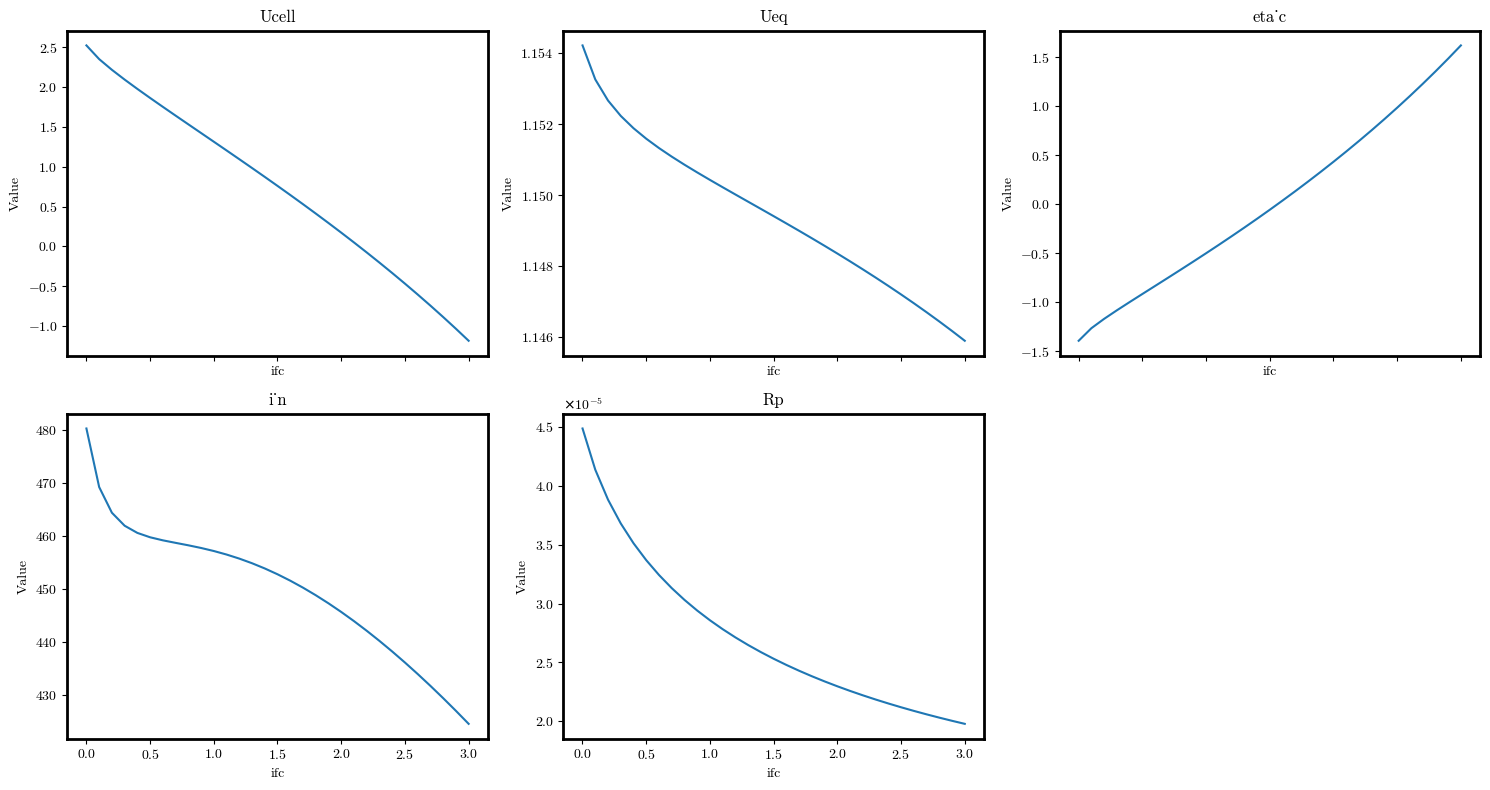


Results for sample 1:
Tfc                    363.0
Pa_des         236666.666667
Pc_des           213333.3332
Sc                  4.066667
Phi_c_des                0.4
epsilon_gdl         0.716667
tau                      4.0
epsilon_mc              0.15
epsilon_c                0.2
e                        4.0
Re                  0.000001
i0_c_ref          333.333667
kappa_co                0.01
kappa_c                  0.0
a_slim              0.666667
b_slim              0.666667
a_switch            0.666667
Name: 1, dtype: object


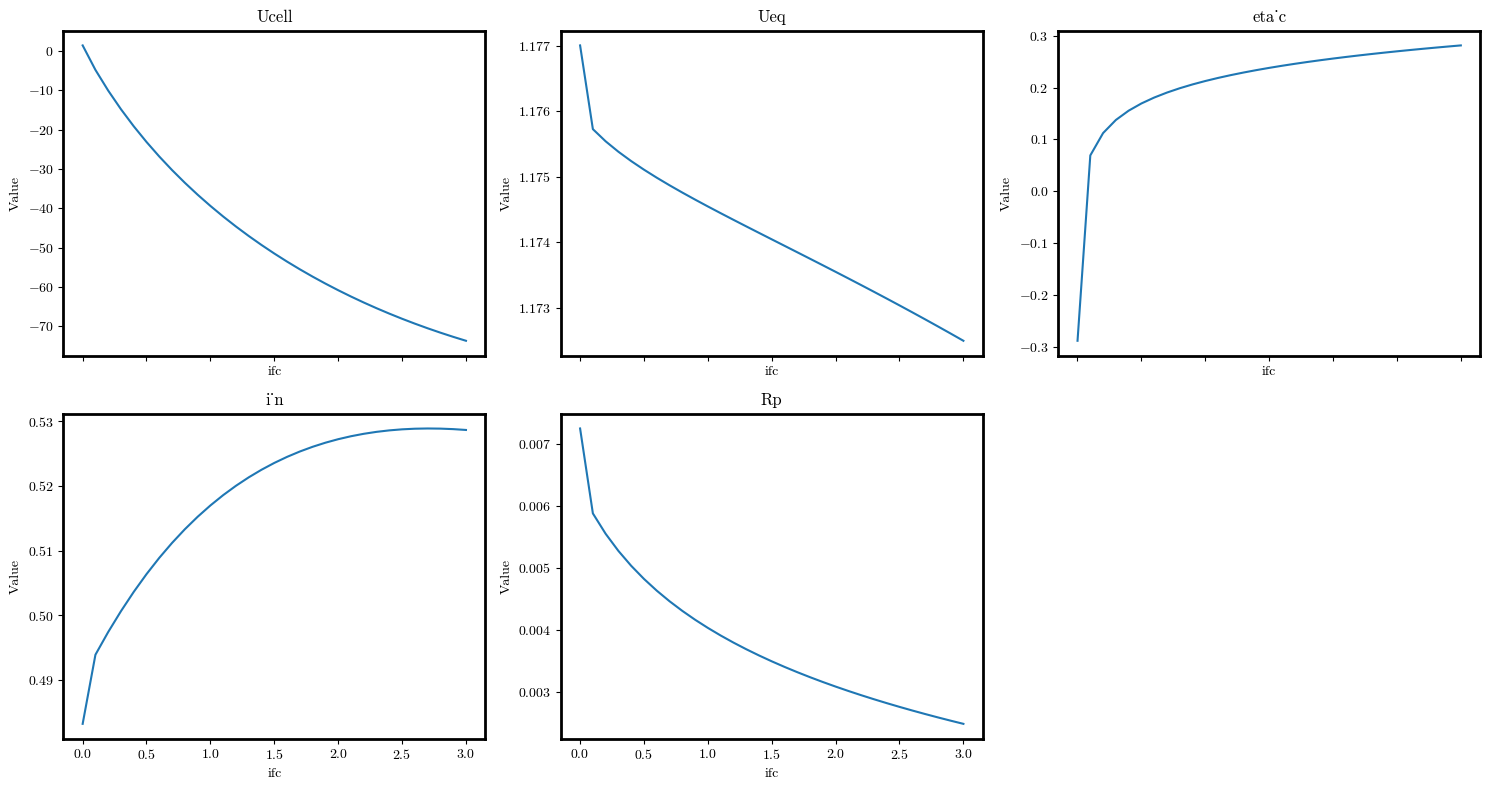


Results for sample 2:
Tfc                    353.0
Pa_des         236666.666667
Pc_des         200000.000133
Sc                  4.066667
Phi_c_des                0.1
epsilon_gdl         0.716667
tau                      1.0
epsilon_mc          0.316667
epsilon_c               0.25
e                        3.0
Re                  0.000002
i0_c_ref               0.001
kappa_co               26.67
kappa_c                  0.0
a_slim                   1.0
b_slim              0.666667
a_switch                 0.0
Name: 2, dtype: object


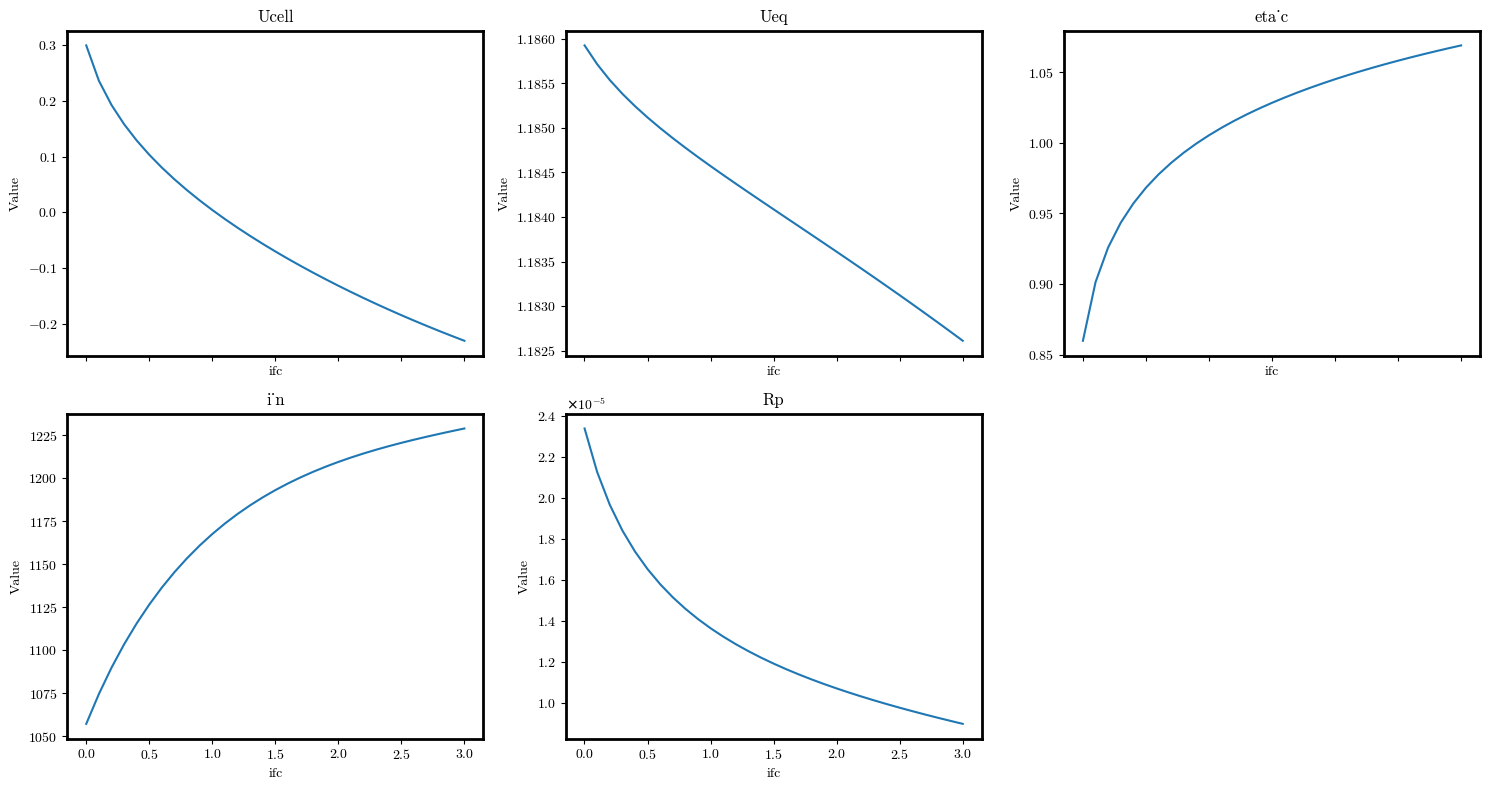


Results for sample 3:
Tfc                 343.0
Pa_des           110000.0
Pc_des           101325.0
Sc               4.066667
Phi_c_des             1.0
epsilon_gdl          0.55
tau                   2.0
epsilon_mc       0.316667
epsilon_c             0.3
e                     5.0
Re               0.000005
i0_c_ref       166.667333
kappa_co            13.34
kappa_c               0.0
a_slim                0.0
b_slim                0.0
a_switch         0.333333
Name: 3, dtype: object


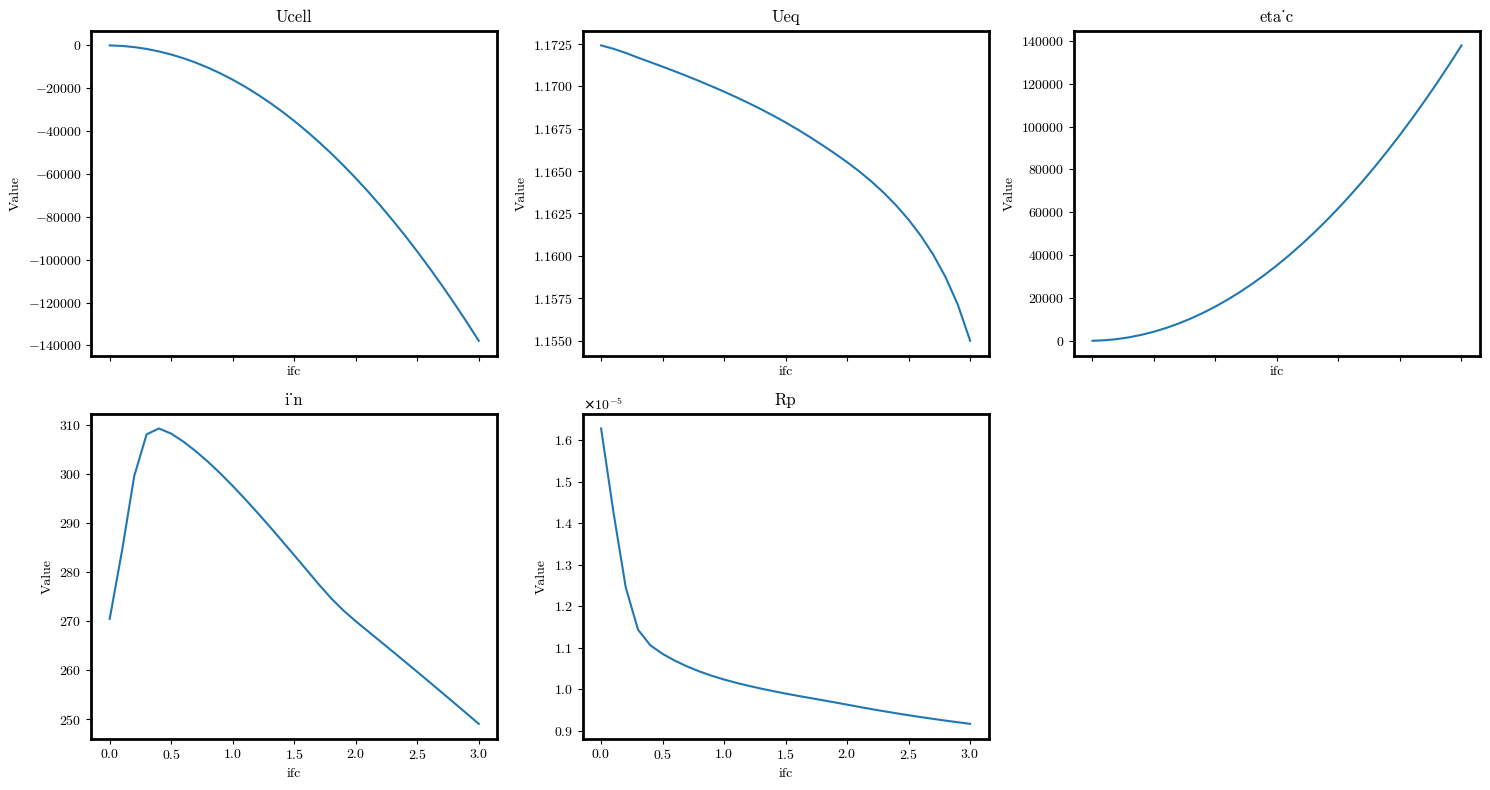


Results for sample 4:
Tfc                    343.0
Pa_des         236666.666667
Pc_des           213333.3332
Sc                  4.066667
Phi_c_des                0.4
epsilon_gdl             0.55
tau                      2.0
epsilon_mc          0.316667
epsilon_c                0.3
e                        5.0
Re                  0.000005
i0_c_ref          166.667333
kappa_co               13.34
kappa_c                  0.0
a_slim                   0.0
b_slim                   0.0
a_switch            0.333333
Name: 4, dtype: object


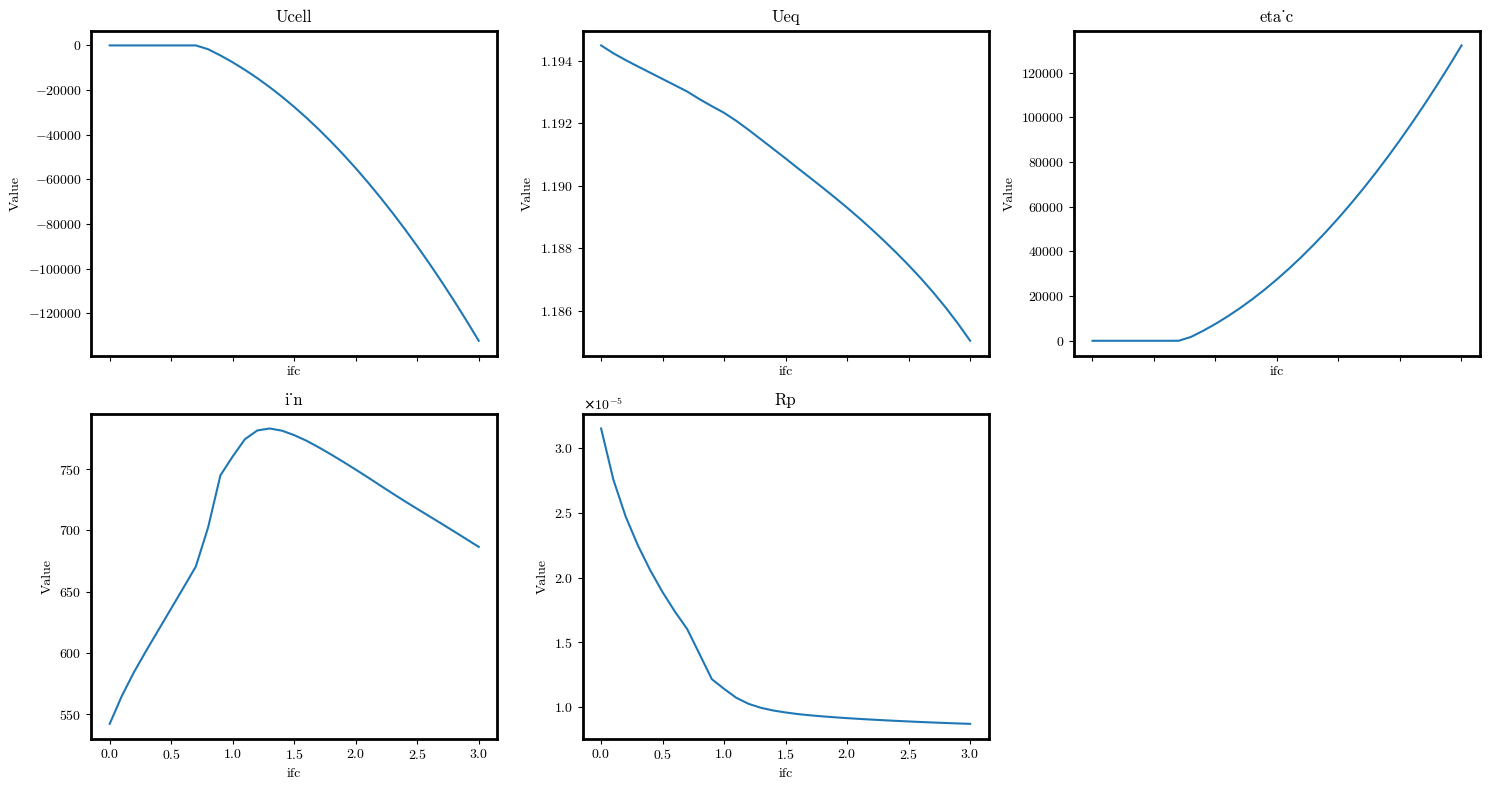


Results for sample 5:
Tfc                    353.0
Pa_des         173333.333333
Pc_des         123333.333733
Sc                  4.066667
Phi_c_des                1.0
epsilon_gdl         0.633333
tau                      2.0
epsilon_mc               0.4
epsilon_c                0.2
e                        5.0
Re                  0.000001
i0_c_ref          333.333667
kappa_co                0.01
kappa_c                100.0
a_slim              0.333333
b_slim                   1.0
a_switch                 1.0
Name: 5, dtype: object


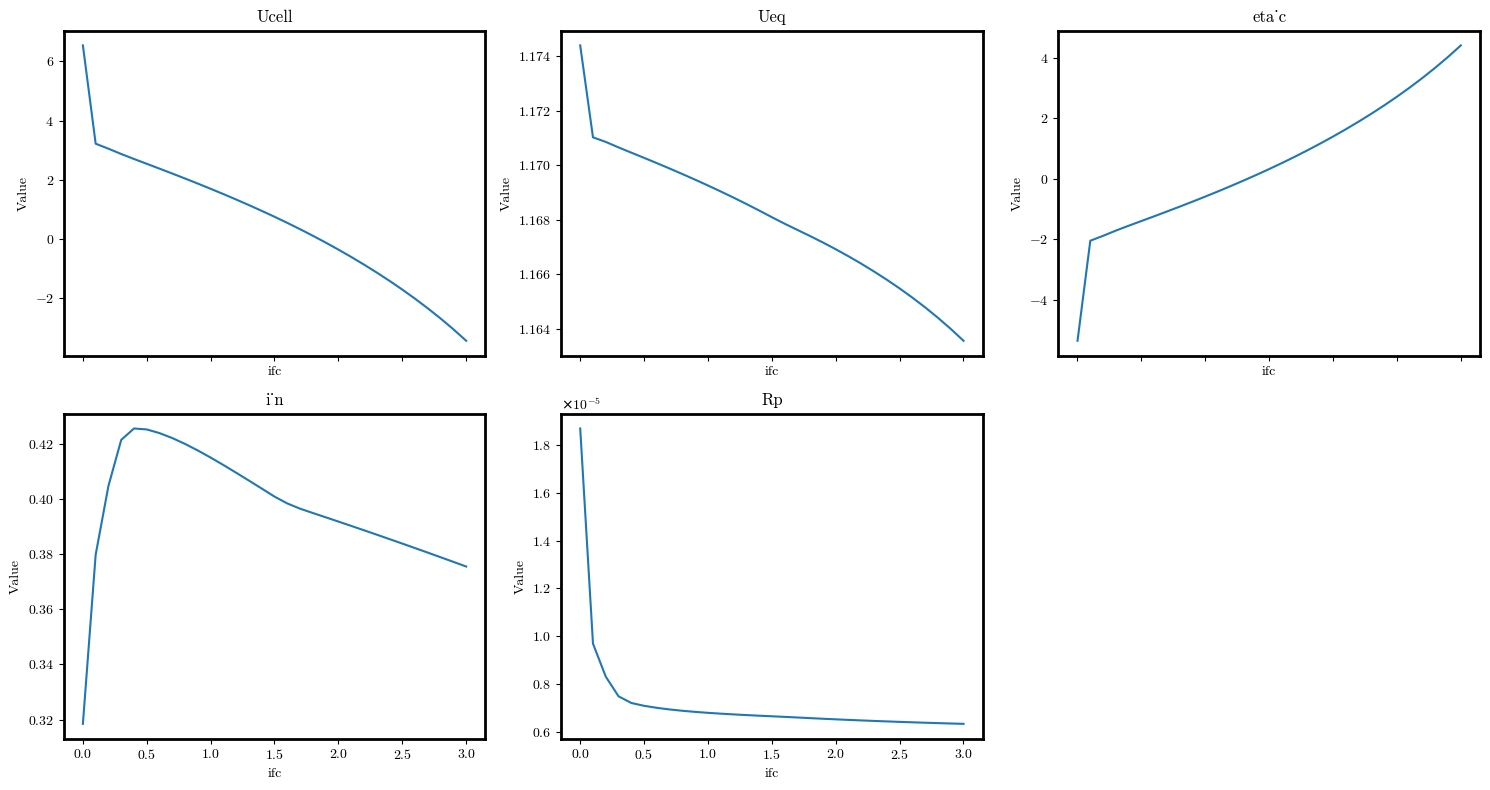


Results for sample 6:
Tfc                    333.0
Pa_des         236666.666667
Pc_des         186666.667067
Sc                  4.066667
Phi_c_des                1.0
epsilon_gdl         0.716667
tau                      4.0
epsilon_mc              0.15
epsilon_c                0.2
e                        3.0
Re                  0.000003
i0_c_ref               0.001
kappa_co               13.34
kappa_c                  0.0
a_slim                   0.0
b_slim                   1.0
a_switch                 1.0
Name: 6, dtype: object


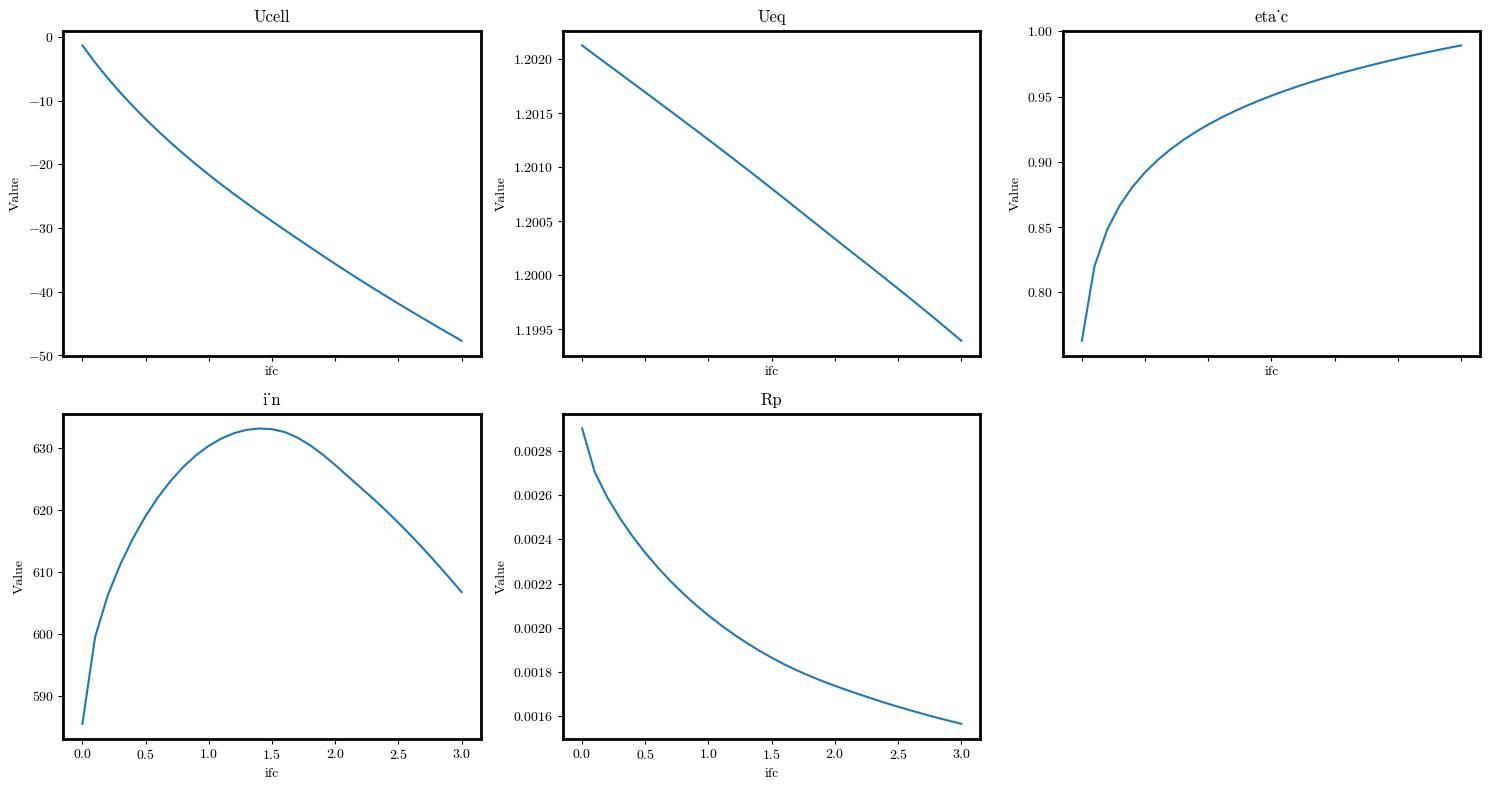

In [31]:
plotting_curves_voltage_values(results_int_curves)